## Fetch the data

In [1]:
import os
import sys
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

from load_data import load_data_from_postgres

query = "SELECT * FROM xdr_data"
df = load_data_from_postgres(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# Treat missing values by replacing with mean (for numerical) or mode (for categorical)
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)

# Treat outliers by capping them to the mean ± 3 standard deviations
for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numerical columns
    mean_value = df[column].mean()
    std_dev = df[column].std()
    upper_limit = mean_value + 3 * std_dev
    lower_limit = mean_value - 3 * std_dev

    # Replace outliers with mean
    df[column] = df[column].apply(lambda x: mean_value if x < lower_limit or x > upper_limit else x)

# Display the cleaned dataset
print("Data after treating missing values and outliers:")
print(df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8312\89050368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8312\89050368.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Data after treating missing values and outliers:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

       Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  104608.560347  2.082014e+14   3.366496e+10  3.552121e+13   
1  104608.560347  2.082019e+14   3.368185e+10  3.579401e+13   
2  104608.560347  2.082003e+14   3.376063e+10  3.528151e+13   
3  104608.560347  2.082014e+14   3.375034e+10  3.535661e+13   
4  104608.560347  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   

In [15]:
import os
import sys

sys.path.append(os.path.abspath('../scripts'))

from experience_analytics import experience_analytics
from display_top_bottom_frequent import display_top_bottom_frequent

aggregated_experience_data = experience_analytics(df)
# Display the results
aggregated_experience_data.head()
# Call the function to display top, bottom, and most frequent values for TCP, RTT, and Throughput
display_top_bottom_frequent(df)

c:\Users\Administrator\Desktop\KAIM\Telecom_Analysis\Telecom-Analysis\scripts\experience_analytics.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


c:\Users\Administrator\Desktop\KAIM\Telecom_Analysis\Telecom-Analysis\scripts\experience_analytics.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

TCP Retransmission Values:
Top 10:
121404    372356204.0
121439    372210984.0
61581     369958724.0
79919     368643528.0
105586    367686534.0
42552     366414808.0
37815     366148436.0
786       365950245.0
61170     363955072.0
61552     363750572.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
2.080991e+07      538
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

RTT Values:
Top 10:
13639     1787.0
92460     1785.0
138828    1783.0
34853     1769.0
96422     1769.0
12953     1768.0
17861     1768.0
112079    1766.0
8498      1765.0
7444      1763.0
Name: Avg RTT 

In [17]:
# Ensure that the required methods are available in your script
def top_bottom_frequent_values(df, column, n=10):
    """
    Computes and returns the top, bottom, and most frequent values for a specified column.
    """
    top_values = df[column].nlargest(n)
    bottom_values = df[column].nsmallest(n)
    most_frequent_values = df[column].value_counts().head(n)
    
    return {
        'top_values': top_values,
        'bottom_values': bottom_values,
        'most_frequent_values': most_frequent_values
    }

def display_top_bottom_frequent(df):
    """
    Computes and displays the top, bottom, and most frequent values for TCP, RTT, and Throughput.
    """
    # Top, bottom, and most frequent TCP values
    tcp_values = top_bottom_frequent_values(df, 'TCP DL Retrans. Vol (Bytes)')
    print("TCP Retransmission Values:")
    print(f"Top 10:\n{tcp_values['top_values']}")
    print(f"Bottom 10:\n{tcp_values['bottom_values']}")
    print(f"Most Frequent:\n{tcp_values['most_frequent_values']}\n")

    # Top, bottom, and most frequent RTT values
    rtt_values = top_bottom_frequent_values(df, 'Avg RTT DL (ms)')
    print("RTT Values:")
    print(f"Top 10:\n{rtt_values['top_values']}")
    print(f"Bottom 10:\n{rtt_values['bottom_values']}")
    print(f"Most Frequent:\n{rtt_values['most_frequent_values']}\n")

    # Top, bottom, and most frequent Throughput values
    throughput_values = top_bottom_frequent_values(df, 'Avg Bearer TP DL (kbps)')
    print("Throughput Values:")
    print(f"Top 10:\n{throughput_values['top_values']}")
    print(f"Bottom 10:\n{throughput_values['bottom_values']}")
    print(f"Most Frequent:\n{throughput_values['most_frequent_values']}\n")

# Use the functions
print("Analyzing top, bottom, and most frequent values:")
display_top_bottom_frequent(df)


Analyzing top, bottom, and most frequent values:
TCP Retransmission Values:
Top 10:
121404    372356204.0
121439    372210984.0
61581     369958724.0
79919     368643528.0
105586    367686534.0
42552     366414808.0
37815     366148436.0
786       365950245.0
61170     363955072.0
61552     363750572.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most Frequent:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
2.080991e+07      538
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

RTT Values:
Top 10:
13639     1787.0
92460     1785.0
138828    1783.0
34853     1769.0
96422     1769.0
12953     1768.0
17861     1768.0
112079    1766.0

# Plot the distributions of throughput and TCP retransmission

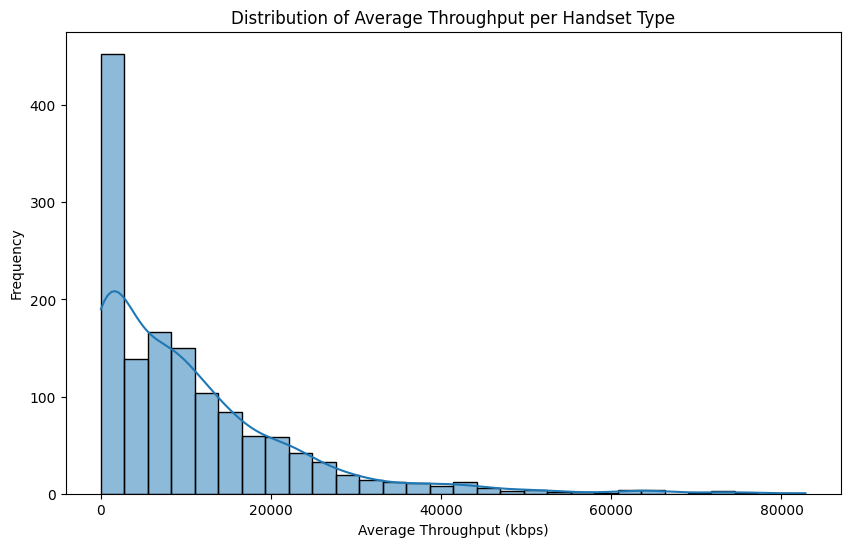

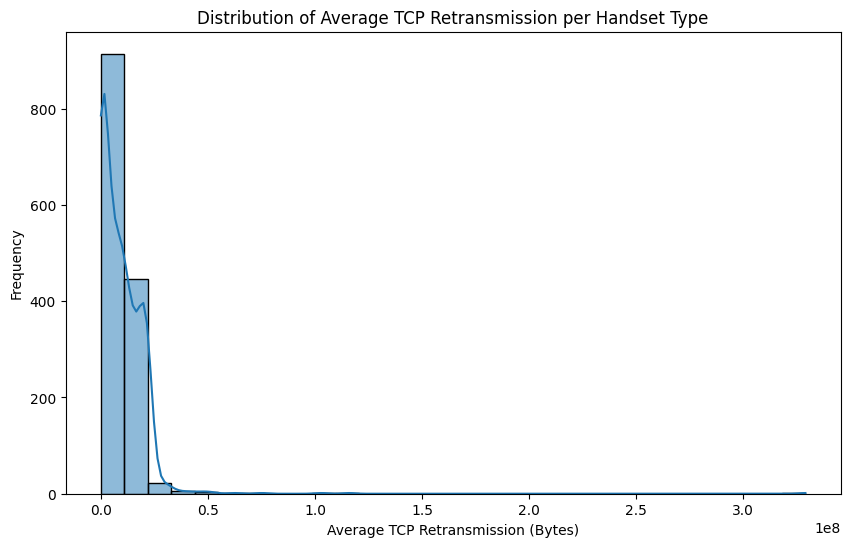

Interpretation of Average Throughput per Handset Type:
Handset Type with the highest average throughput: Zyxel Communicat. Sbg3600 (82818.0 kbps)
Handset Type with the lowest average throughput: Acer Liquid M220 (0.0 kbps)

Interpretation of Average TCP Retransmission per Handset Type:
Handset Type with the highest average TCP retransmission: Huawei Bln-Al10 (329064569.0 Bytes)
Handset Type with the lowest average TCP retransmission: Gemalto M2M Gmbh Cinterion Ehs5-E (12.0 Bytes)


In [20]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
# import throughput_tcp_per_handset, plot_distributions, report_throughput_tcp
from plot_distributions import plot_distributions
from throughput_tcp_per_handset import throughput_tcp_per_handset
from report_throughput_tcp import report_throughput_tcp

# Assuming the cleaned data is already loaded into 'cleaned_data' DataFrame from PostgreSQL
throughput_df, tcp_df = throughput_tcp_per_handset(df)

# Plot the distributions of throughput and TCP retransmission
plot_distributions(throughput_df, tcp_df)

# Report the findings
report_throughput_tcp(throughput_df, tcp_df)

## Visualizing average throughput, TCP retransmission, and RTT per handset type

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8312\782645291.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8312\782645291.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8312\782645291.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


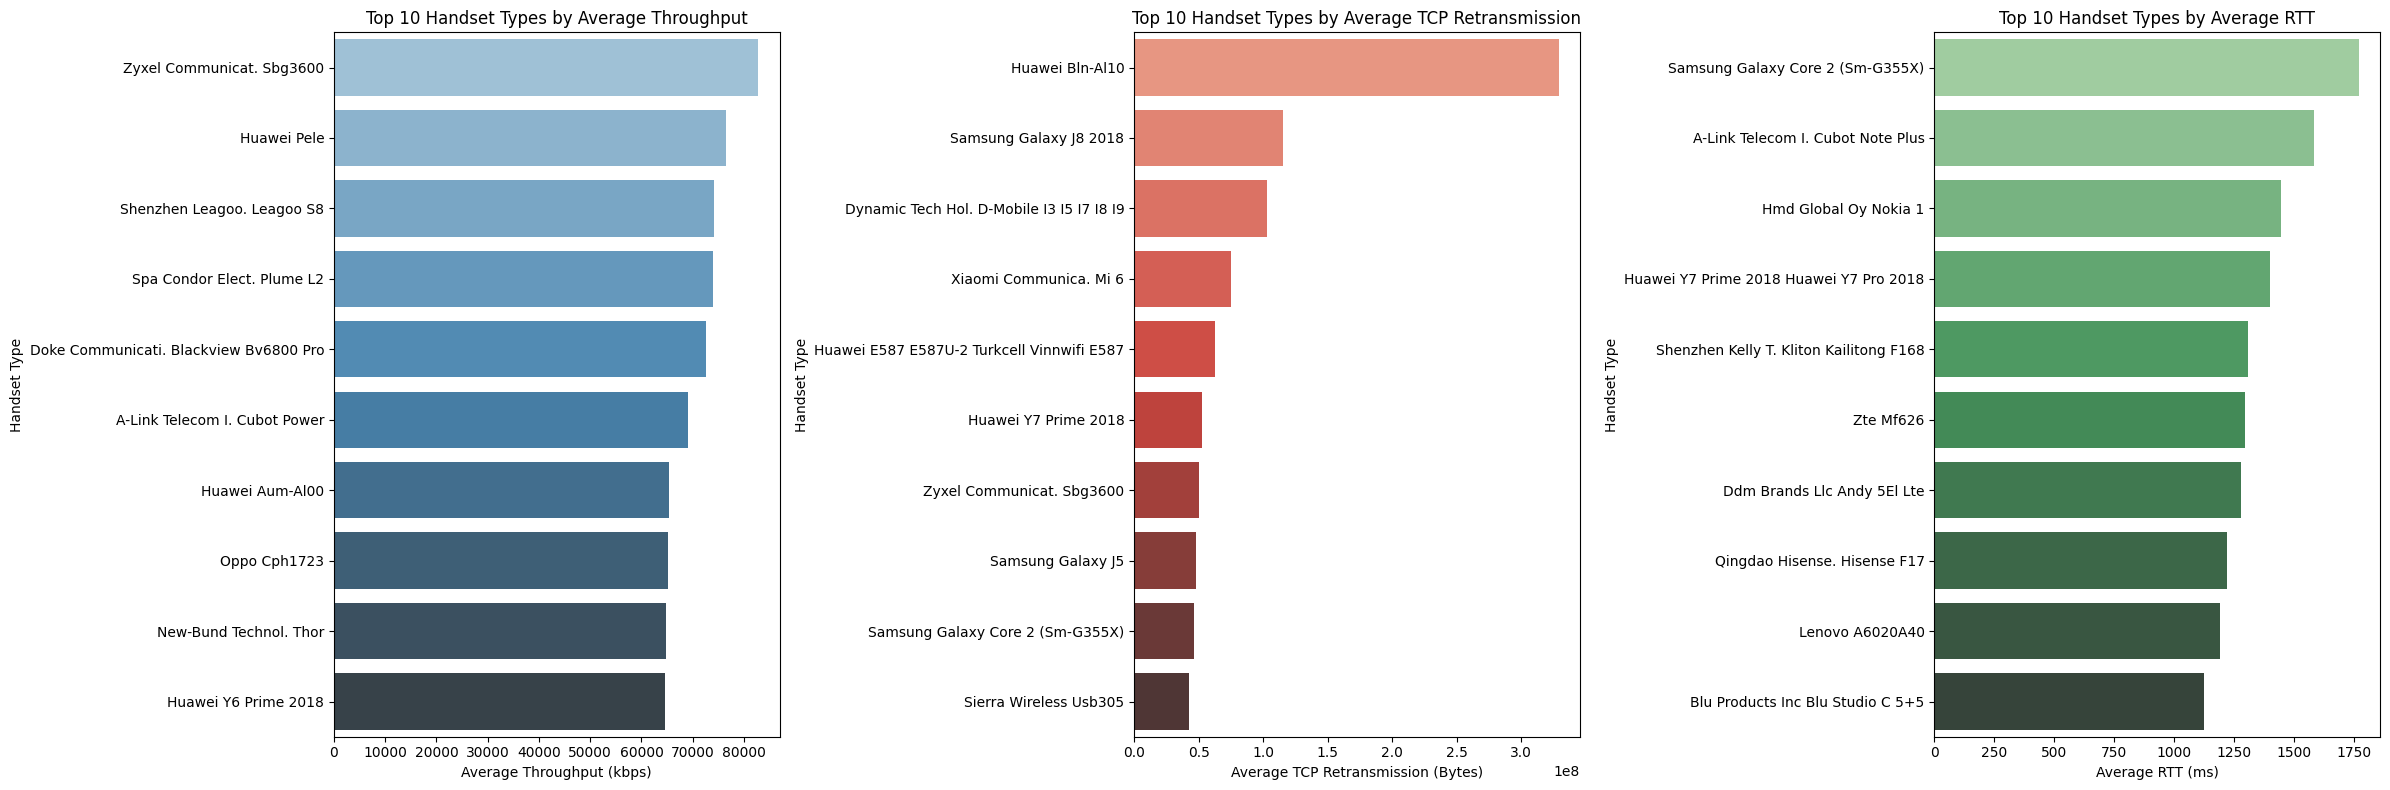

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your cleaned DataFrame

# Compute average throughput, TCP retransmission, and RTT per handset type
throughput_by_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().sort_values(ascending=False)
tcp_retrans_by_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().sort_values(ascending=False)
rtt_by_handset = df.groupby('Handset Type')['Avg RTT DL (ms)'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(24, 8))

# Top 10 Handset Types by Average Throughput
plt.subplot(1, 3, 1)
sns.barplot(
    y=throughput_by_handset.head(10).index, 
    x=throughput_by_handset.head(10).values, 
    palette="Blues_d"
)
plt.title("Top 10 Handset Types by Average Throughput")
plt.xlabel("Average Throughput (kbps)")
plt.ylabel("Handset Type")

# Top 10 Handset Types by Average TCP Retransmission
plt.subplot(1, 3, 2)
sns.barplot(
    y=tcp_retrans_by_handset.head(10).index, 
    x=tcp_retrans_by_handset.head(10).values, 
    palette="Reds_d"
)
plt.title("Top 10 Handset Types by Average TCP Retransmission")
plt.xlabel("Average TCP Retransmission (Bytes)")
plt.ylabel("Handset Type")

# Top 10 Handset Types by Average RTT
plt.subplot(1, 3, 3)
sns.barplot(
    y=rtt_by_handset.head(10).index, 
    x=rtt_by_handset.head(10).values, 
    palette="Greens_d"
)
plt.title("Top 10 Handset Types by Average RTT")
plt.xlabel("Average RTT (ms)")
plt.ylabel("Handset Type")

plt.tight_layout()
plt.show()